In [1]:
%%capture
! pip install xclim

In [2]:
import xclim.sdba

In [3]:
import xesmf
import xarray as xr
import numpy as np
from science_validation_manual import *
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rhg_compute_tools.kubernetes as rhgk

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [4]:
client, cluster = rhgk.get_micro_cluster()

In [5]:
cluster.scale(125)
cluster

In [ ]:
client.restart()
client.close()
cluster.close()

In [12]:
ds_era_5 = read_gcs_zarr('gs://clean-b1dbca25/reanalysis/ERA-5/F320/tasmin.1995-2015.F320.zarr')['tasmin']
ds_historical_clean_sim_gcm = read_gcs_zarr('gs://scratch-170cd6ec/080c199e-1208-4068-911e-98bd5d2b59ab/e2e-nesm3-tasmin-656ln-3232100922/rechunked.zarr')['tasmin']
ds_historical_bs_gcm = read_gcs_zarr('gs://biascorrected-492e989a/stage/CMIP/NUIST/NESM3/historical/r1i1p1f1/day/tasmin/gn/v20220114235347.zarr')['tasmin']
ds_ssp245_clean_sim_gcm = read_gcs_zarr('gs://scratch-170cd6ec/080c199e-1208-4068-911e-98bd5d2b59ab/e2e-nesm3-tasmin-656ln-1526085477/rechunked.zarr')['tasmin']
ds_ssp245_bs_gcm = read_gcs_zarr('gs://biascorrected-492e989a/stage/ScenarioMIP/NUIST/NESM3/ssp245/r1i1p1f1/day/tasmin/gn/v20220114235347.zarr')['tasmin']
ds_ssp245_dsc_gcm = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/NUIST/NESM3/ssp245/r1i1p1f1/day/tasmin/gn/v20220114235347.zarr')['tasmin']

## How much extrapolation out-of-sample in bias correction? comparing minima in ERA-5, raw GCM, bias corrected GCM

In [7]:
ds_dict = {    
    'era-5':ds_era_5,
    'historical-biacorrected-gcm':ds_historical_bs_gcm,  
    'historical-clean-sim-gcm':ds_historical_clean_sim_gcm
}

### minimum

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/si

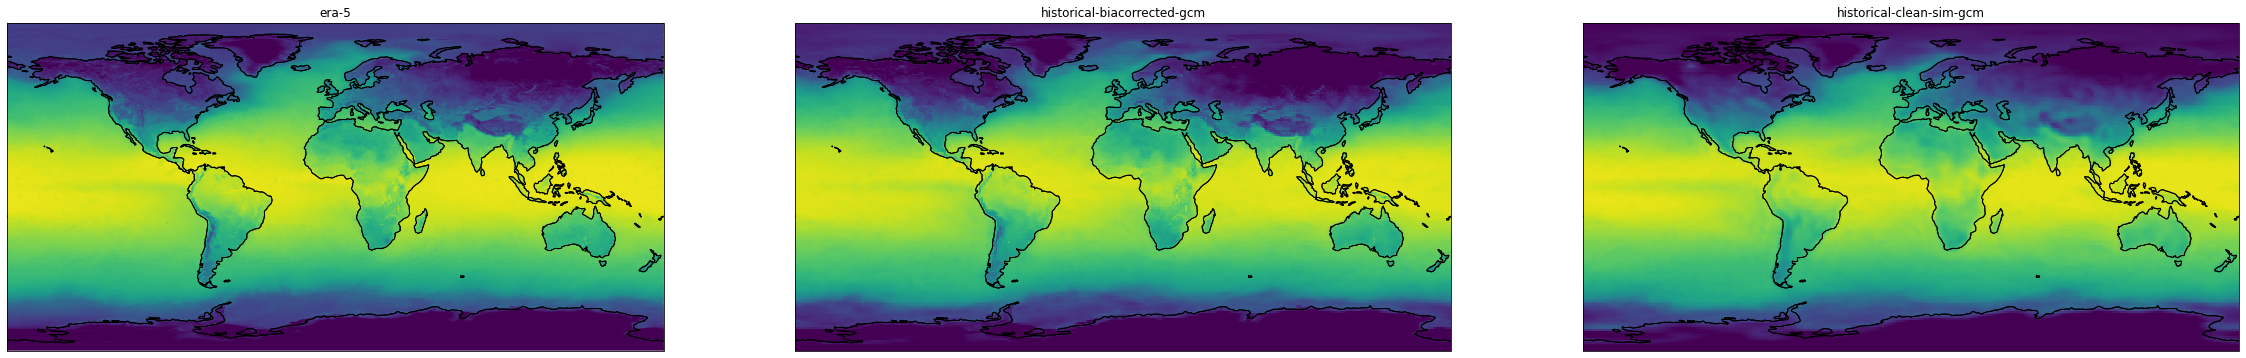

In [8]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.min('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### maximum

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/si

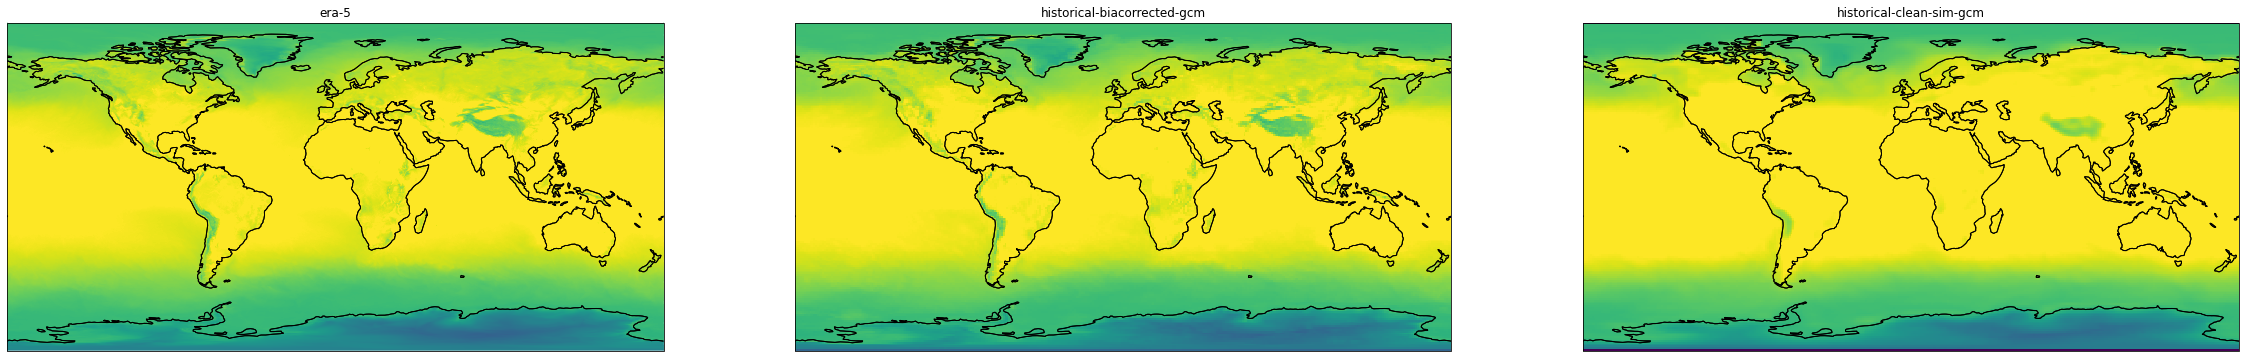

In [9]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.max('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### mean

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/srv/conda/envs/notebook/lib/python3.8/si

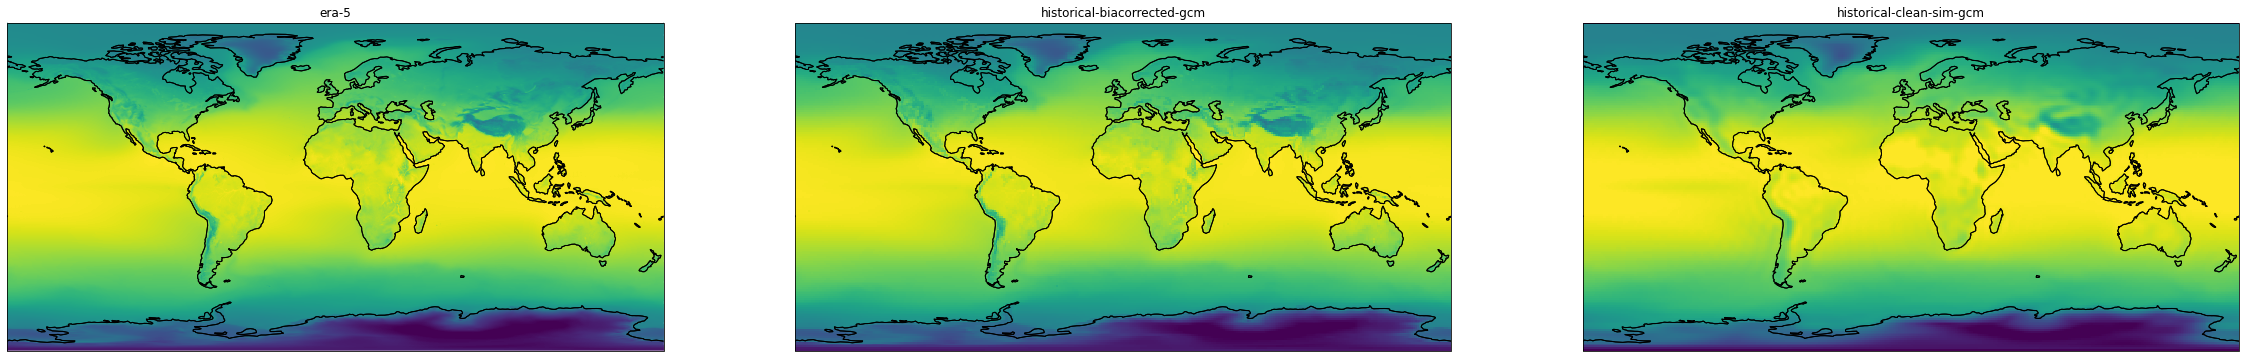

In [10]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.mean('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

## Trends preserved ? Comparing GCM trends pre and post bias correction 

### maximum

In [13]:
trend_raw = ds_ssp245_clean_sim_gcm.max('time')-ds_historical_clean_sim_gcm.max('time')
trend_bs = ds_ssp245_bs_gcm.max('time')-ds_historical_bs_gcm.max('time')
ds_dict_tr = {
    'trend-raw': trend_raw,
    'trend-biascorrected': trend_bs
}

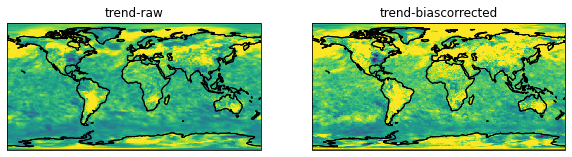

In [14]:
fig, axes = plt.subplots(1, len(ds_dict_tr), figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict_tr.items(): 
    axes[i].coastlines()
    da.plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=-3, vmax=4); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### minimum

In [15]:
trend_raw = ds_ssp245_clean_sim_gcm.min('time')-ds_historical_clean_sim_gcm.min('time')
trend_bs = ds_ssp245_bs_gcm.min('time')-ds_historical_bs_gcm.min('time')
ds_dict_tr = {
    'trend-raw': trend_raw,
    'trend-biascorrected': trend_bs
}

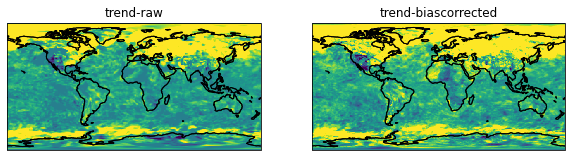

In [16]:
fig, axes = plt.subplots(1, len(ds_dict_tr), figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict_tr.items(): 
    axes[i].coastlines()
    da.plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=-3, vmax=4); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### mean

In [17]:
trend_raw = ds_ssp245_clean_sim_gcm.mean('time')-ds_historical_clean_sim_gcm.mean('time')
trend_bs = ds_ssp245_bs_gcm.mean('time')-ds_historical_bs_gcm.mean('time')
ds_dict_tr = {
    'trend-raw': trend_raw,
    'trend-biascorrected': trend_bs
}

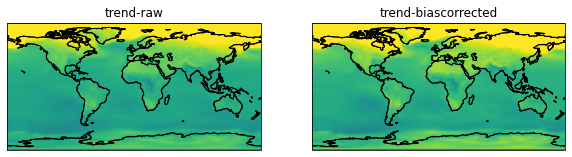

In [18]:
fig, axes = plt.subplots(1, len(ds_dict_tr), figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict_tr.items(): 
    axes[i].coastlines()
    da.plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=-3, vmax=4); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

## Does downscaling preserve spatial patterns ?

### mean

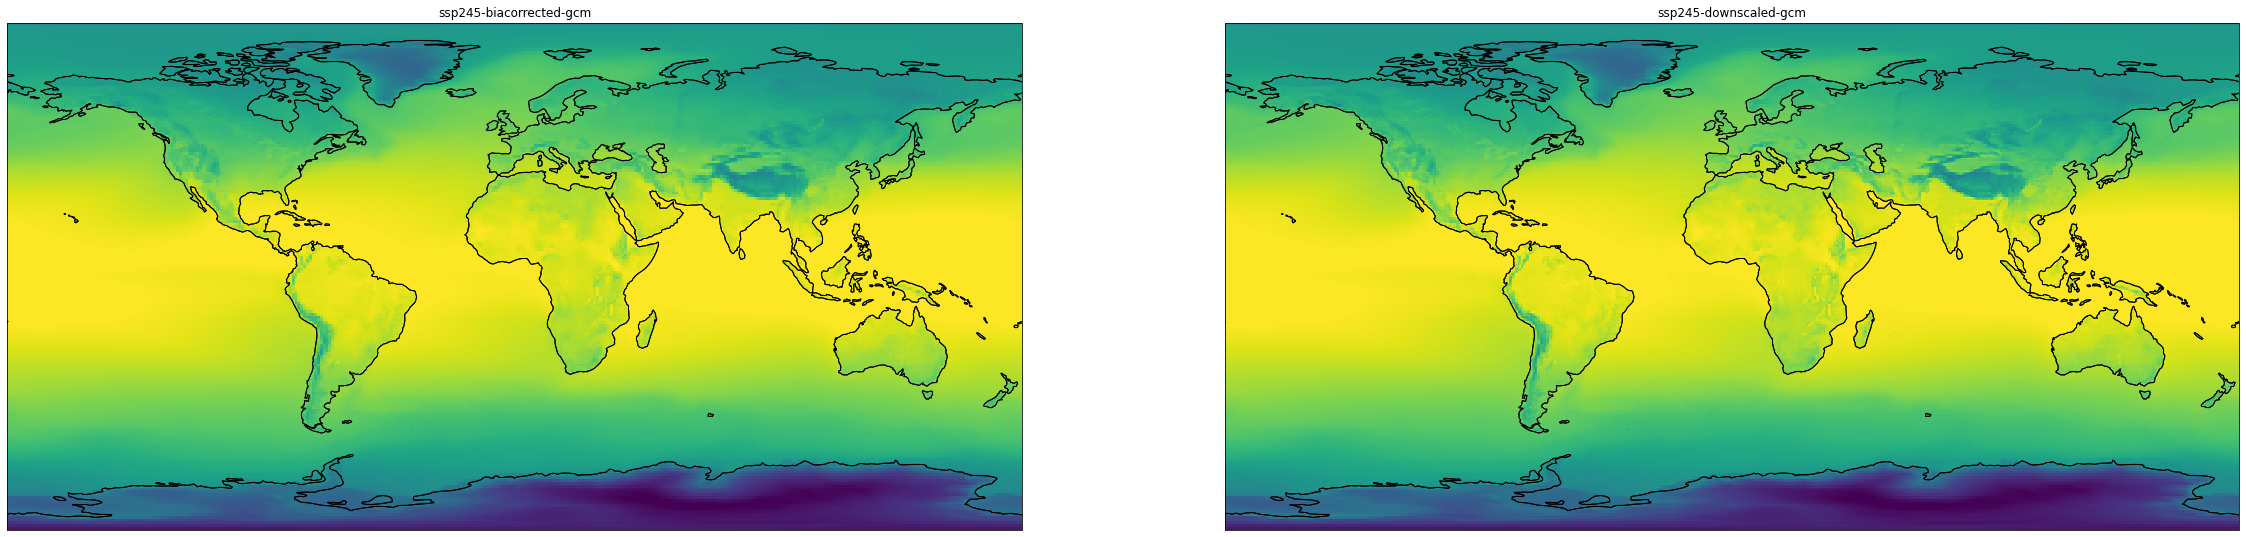

In [20]:
ds_dict = {    
    'ssp245-biacorrected-gcm':ds_ssp245_bs_gcm,  
    'ssp245-downscaled-gcm':ds_ssp245_dsc_gcm
}
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.mean('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### max

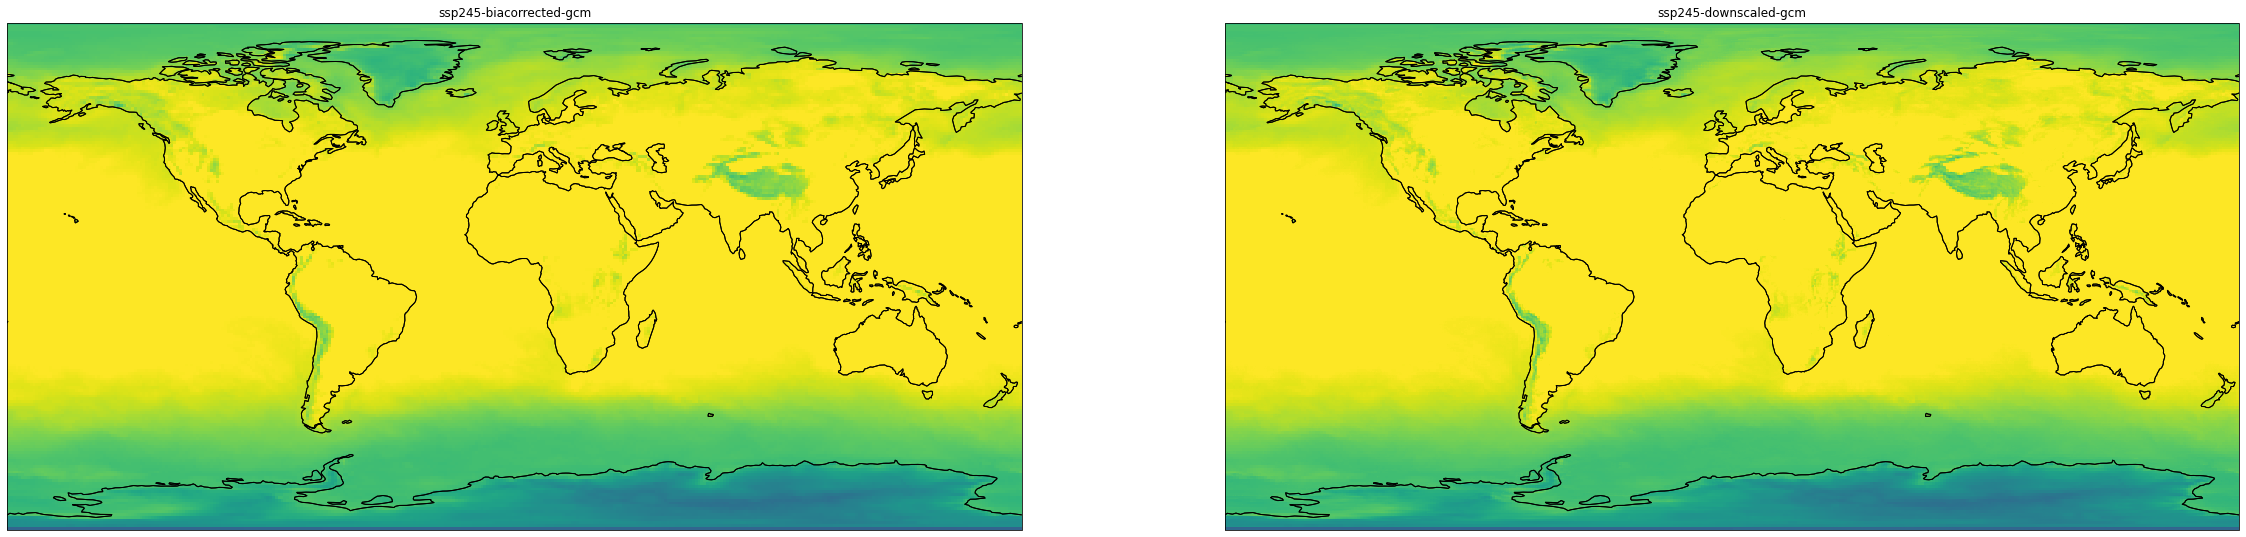

In [21]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.max('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 

### min

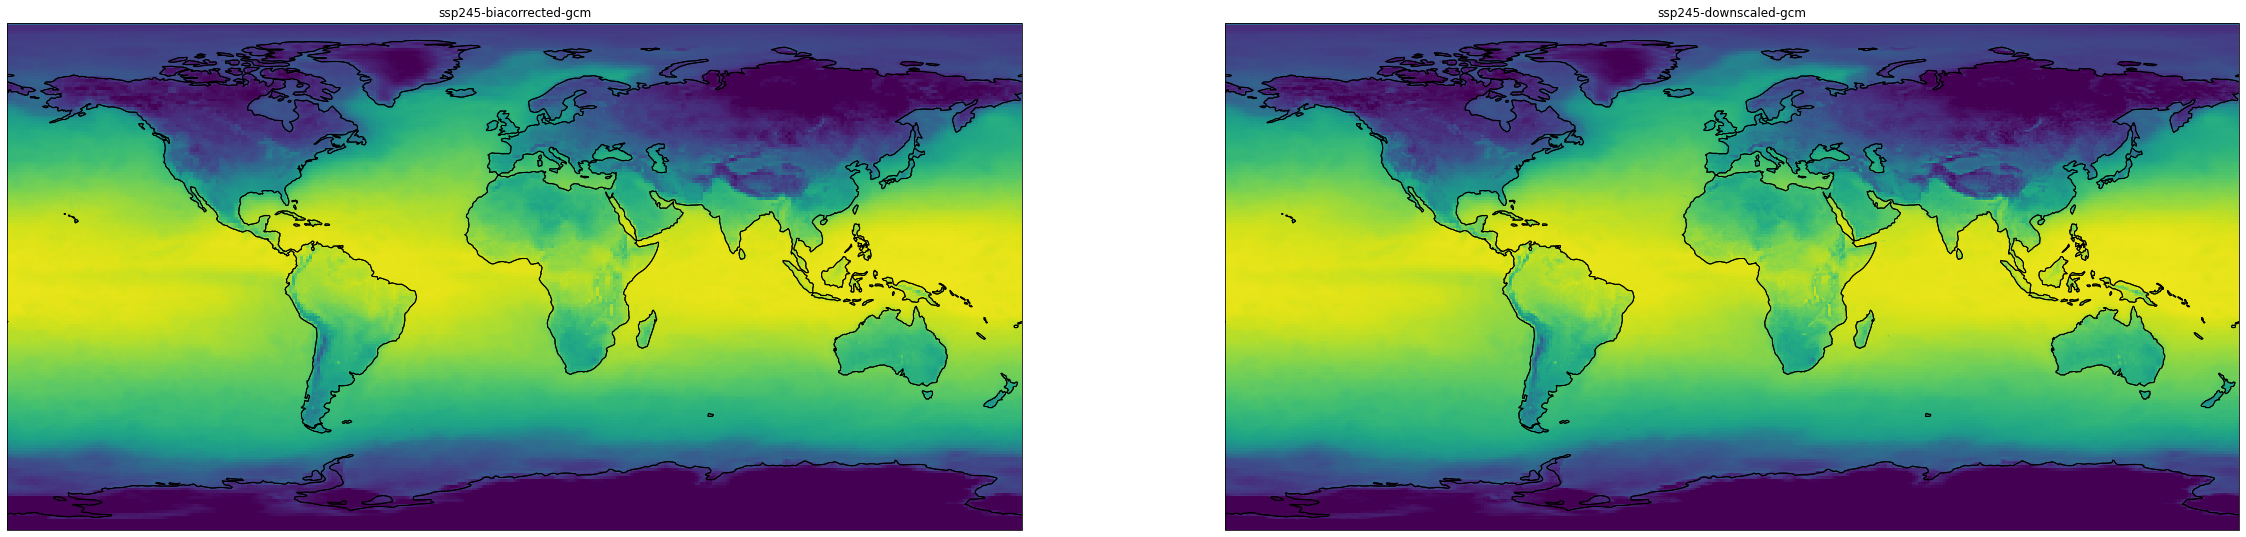

In [22]:
fig, axes = plt.subplots(1, len(ds_dict), figsize=(40, 40), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in ds_dict.items(): 
    axes[i].coastlines()
    da.min('time').plot.pcolormesh(ax=axes[i], add_colorbar=False, vmin=220, vmax=300); 
    axes[i].coastlines();
    axes[i].set_title(key)
    i = i + 1 